In [1]:
!pip install tensorly
!pip install opencv-python


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install --force-reinstall -v "tensorly==0.7.0"

Using pip 22.3.1 from C:\Users\nelli\AppData\Local\Programs\Python\Python39\lib\site-packages\pip (python 3.9)
  Using cached tensorly-0.7.0-py3-none-any.whl (198 kB)
  Using cached numpy-1.24.3-cp39-cp39-win_amd64.whl (14.9 MB)
  Using cached scipy-1.10.1-cp39-cp39-win_amd64.whl (42.5 MB)
  Using cached nose-1.3.7-py3-none-any.whl (154 kB)
  Attempting uninstall: nose
    Found existing installation: nose 1.3.7
    Uninstalling nose-1.3.7:
      Removing file or directory c:\users\nelli\appdata\local\programs\python\python39\lib\site-packages\nose-1.3.7.dist-info\
      Removing file or directory c:\users\nelli\appdata\local\programs\python\python39\lib\site-packages\nose\
      Removing file or directory c:\users\nelli\appdata\local\programs\python\python39\man\man1\
      Removing file or directory c:\users\nelli\appdata\local\programs\python\python39\scripts\nosetests-3.4.exe
      Removing file or directory c:\users\nelli\appdata\local\programs\python\python39\scripts\nosetests.ex

ERROR: Could not install packages due to an OSError.
Consider using the `--user` option or check the permissions.
Traceback (most recent call last):
  File "C:\Users\nelli\AppData\Local\Programs\Python\Python39\lib\site-packages\pip\_internal\commands\install.py", line 494, in run
    installed = install_given_reqs(
  File "C:\Users\nelli\AppData\Local\Programs\Python\Python39\lib\site-packages\pip\_internal\req\__init__.py", line 90, in install_given_reqs
    uninstalled_pathset.commit()
  File "C:\Users\nelli\AppData\Local\Programs\Python\Python39\lib\site-packages\pip\_internal\req\req_uninstall.py", line 424, in commit
    self._moved_paths.commit()
  File "C:\Users\nelli\AppData\Local\Programs\Python\Python39\lib\site-packages\pip\_internal\req\req_uninstall.py", line 277, in commit
    save_dir.cleanup()
  File "C:\Users\nelli\AppData\Local\Programs\Python\Python39\lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "C:\Users\nel

In [3]:
!pip install --force-reinstall -v "numpy==1.23.5"

Using pip 22.3.1 from C:\Users\nelli\AppData\Local\Programs\Python\Python39\lib\site-packages\pip (python 3.9)
  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Removing file or directory c:\users\nelli\appdata\local\programs\python\python39\lib\site-packages\numpy-1.24.3.dist-info\
      Removing file or directory c:\users\nelli\appdata\local\programs\python\python39\lib\site-packages\numpy\
      Removing file or directory c:\users\nelli\appdata\local\programs\python\python39\scripts\f2py.exe
      Successfully uninstalled numpy-1.24.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.1 requires flatbuffers<2,>=1.12, but you have flatbuffers 22.9.24 which is incompatible.
tensorflow 2.9.1 requires tensorflow-estimator<2.10.0,>=2.9.0rc0, but you have tensorflow-estimator 2.10.0 which is incompatible.
tensorflow-gpu 2.9.1 requires flatbuffers<2,>=1.12, but you have flatbuffers 22.9.24 which is incompatible.
tensorflow-gpu 2.9.1 requires tensorflow-estimator<2.10.0,>=2.9.0rc0, but you have tensorflow-estimator 2.10.0 which is incompatible.
numba 0.55.2 requires numpy<1.23,>=1.18, but you have numpy 1.23.5 which is incompatible.
flwr 0.19.0 requires numpy<1.21.0,>=1.19.0; python_version < "3.10", but you have numpy 1.23.5 which is incompatible.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import logging
from typing import Type

import numpy as np
import warnings
import os
import cv2
import pickle
import pandas as pd
import scipy as sp
import scipy.misc
from matplotlib import pyplot as plt
from glob import glob
import tensorly as tl
import numpy as np
from sklearn.linear_model import orthogonal_mp
from tensorly.decomposition import tucker, partial_tucker
from sklearn.feature_extraction.image import extract_patches_2d, reconstruct_from_patches_2d
warnings.filterwarnings('ignore')
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

logging.basicConfig(level=logging.INFO)

In [5]:
class Pursuit:
    """
    Algorithms that inherit from this class are methods to solve problems of the like
    \min_A \| DA - Y \|_2 s.t. \|A\|_0 <= t.
    Here, D is a given dictionary of size (n x K)
    Y is a given matrix of size (n x N), where N is the number of samples
    The Pursuit will return a matrix A of size (K x N).
    """

    def __init__(self, dictionary, max_iter=False, tol=None, sparsity=None):
        self.D = np.array(dictionary.matrix)
        self.max_iter = max_iter
        self.tol = tol
        self.sparsity = sparsity
        if (self.tol is None and self.sparsity is None) or (self.tol is not None and self.sparsity is not None):
            raise ValueError("blub")
        self.data = None
        self.alphas = []

    def fit(self, Y):
        return [], self.alphas

In [6]:
class OrthogonalMatchingPursuit(Pursuit):
    """
    Wrapper for orthogonal_mp from scikit-learn
    """

    def fit(self, Y):
        return orthogonal_mp(self.D, Y, n_nonzero_coefs=self.sparsity,
                             tol=self.tol, precompute=True)


In [7]:
class Dictionary:
    """
    The Dictionary class is more or less a wrapper around the numpy array class. It holds a numpy ndarray in
    the attribute `matrix` and adds some useful functions for it. The dictionary elements can be accessed
    either by D.matrix[i,j] or directly through D[i,j].
    """

    def __init__(self, matrix):
        self.matrix = np.array(matrix)
        self.shape = matrix.shape

    def __getitem__(self, item):
        return self.matrix[item]

    def is_unitary(self):
        """
        Checks whether the dictionary is unitary.
        Returns:
            True, if the dicitonary is unitary.
        """
        n, K = self.shape
        if n == K:
            return np.allclose(np.dot(self.matrix.T, self.matrix), np.eye(n))
        else:
            return False

    def is_normalized(self):
        """
        Checks wheter the dictionary is l2-normalized.
        Returns:
            True, if dictionary is l2-normalized.
        """
        n, K = self.shape
        return np.allclose([np.linalg.norm(self.matrix[:, i]) for i in range(K)], np.ones(K))


    def mutual_coherence(self):
        """
        Computes the dictionary's mutual coherence.
        Returns:
            Mutual coherence
        """
        return np.max(self._mutual_coherence(self.matrix))

    @staticmethod
    def _mutual_coherence(D):
        n, K = D.shape
        mu = [np.abs(np.dot(D[:, i].T, D[:, j]) /
                     (np.linalg.norm(D[:, i]) * np.linalg.norm(D[:, j])))
              for i in range(K) for j in range(K) if j != i]
        return mu

    def to_img(self):
        """
        Transforms the dictionary columns into patches and orders them for plotting purposes.
        Returns:
            Reordered dictionary matrix
        """
        # dictionary dimensions
        D = self.matrix
        n, K = D.shape
        M = self.matrix
        # stretch atoms
        for k in range(K):
            M[:, k] = M[:, k] - (M[:, k].min())
            if M[:, k].max():
                M[:, k] = M[:, k] / D[:, k].max()

        # patch size
        n_r = int(np.sqrt(n))

        # patches per row / column
        K_r = int(np.sqrt(K))

        # we need n_r*K_r+K_r+1 pixels in each direction
        dim = n_r * K_r + K_r + 1
        V = np.ones((dim, dim)) * np.min(D)

        # compute the patches
        patches = [np.reshape(D[:, i], (n_r, n_r)) for i in range(K)]

        # place patches
        for i in range(K_r):
            for j in range(K_r):
                V[j * n_r + 1 + j:(j + 1) * n_r + 1 + j, i * n_r + 1 + i:(i + 1) * n_r + 1 + i] = patches[
                    i * K_r + j]
        return V

In [8]:
class KSVD:
    """
    Implements the original K-SVD Algorithm as described in [1].
    [1] Aharon, M., Elad, M. and Bruckstein, A., 2006. K-SVD: An algorithm for designing overcomplete dictionaries for
        sparse representation. IEEE Transactions on signal processing, 54(11), p.4311.
    Args:
        dictionary: Initial dictionary of type sparselandtools.dictionaries.Dictionary
        pursuit: Pursuit method to be used (any method from sparselandtools.pursuits)
        sparsity: Target sparsity
        noise_gain: Target noise_gain. If set, this will override the target sparsity
        sigma: Signal or image noise standard deviation.
    """

    def __init__(self, dictionary: Dictionary, pursuit: Type[Pursuit], sparsity: int, noise_gain=None, sigma=None):
        self.dictionary = Dictionary(dictionary.matrix)
        self.alphas = None
        self.pursuit = pursuit
        self.sparsity = sparsity
        self.noise_gain = noise_gain
        self.sigma = sigma
        self.original_image = None
        self.sparsity_values = []
        self.mses = []
        self.ssims = []
        self.psnrs = []
        self.iter = None

    def sparse_coding(self, Y: np.ndarray):
        logging.info("Entering sparse coding stage...")
        if self.noise_gain and self.sigma:
            p = self.pursuit(self.dictionary, tol=(self.noise_gain * self.sigma))
        else:
            p = self.pursuit(self.dictionary, sparsity=self.sparsity)
        self.alphas = p.fit(Y)
        logging.info("Sparse coding stage ended.")

    def dictionary_update(self, Y: np.ndarray):
        # iterate rows
        D = self.dictionary.matrix
        n, K = D.shape
        R = Y - D.dot(self.alphas)
        for k in range(K):
            logging.info("Updating column %s" % k)
            wk = np.nonzero(self.alphas[k, :])[0]
            if len(wk) == 0:
                continue
            Ri = R[:,wk] + D[:,k,None].dot(self.alphas[None,k,wk])
            U, s, Vh = np.linalg.svd(Ri)
            D[:, k] = U[:, 0]
            self.alphas[k, wk] = s[0] * Vh[0, :]
            R[:, wk] = Ri - D[:,k,None].dot(self.alphas[None,k,wk])
        self.dictionary = Dictionary(D)

    def fit(self, Y: np.ndarray, iter: int):
        for i in range(iter):
            logging.info("Start iteration %s" % (i + 1))
            self.sparse_coding(Y)
            self.dictionary_update(Y)
        return self.dictionary, self.alphas

In [9]:
def preprocess(image):
    core, factors = partial_tucker(tl.tensor(image), rank=image.shape, modes=[0, 1, 2])
    return factors[0]


def get_matrix(y, image_path, patch_size):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    component = preprocess(image)
    
    # Extract all reference patches from the image
    patches = extract_patches_2d(component, (patch_size, patch_size))
    data = patches.reshape(patches.shape[0], -1)
    y = np.vstack([y, data])
    
    return y
  
image_directory = 'images/images_squares_25'
image_paths = glob(os.path.join(image_directory, '*.png'))
from random import shuffle
shuffle(image_paths)

In [10]:
image_paths = image_paths[:50]
patch_size = 4

y = np.zeros(patch_size * patch_size)
for image_path in image_paths:
    y = get_matrix(y, image_path, patch_size)
y = np.delete(y, 0, axis=0)

In [11]:
test = y.T
u, s, v = np.linalg.svd(test)

In [12]:
print(u.shape)

(16, 16)


In [13]:
initial_dictionary = Dictionary(u)

In [14]:
initial_dictionary.is_unitary()

True

In [15]:
ksvd = KSVD(initial_dictionary, OrthogonalMatchingPursuit, 16)

In [16]:
# второй аргумент - число итераций
learn_dict, coeff = ksvd.fit(test, 1)

INFO:root:Start iteration 1
INFO:root:Entering sparse coding stage...
INFO:root:Sparse coding stage ended.
INFO:root:Updating column 0
INFO:root:Updating column 1
INFO:root:Updating column 2
INFO:root:Updating column 3
INFO:root:Updating column 4
INFO:root:Updating column 5
INFO:root:Updating column 6
INFO:root:Updating column 7
INFO:root:Updating column 8
INFO:root:Updating column 9
INFO:root:Updating column 10
INFO:root:Updating column 11
INFO:root:Updating column 12
INFO:root:Updating column 13
INFO:root:Updating column 14
INFO:root:Updating column 15


In [17]:
v = learn_dict.matrix

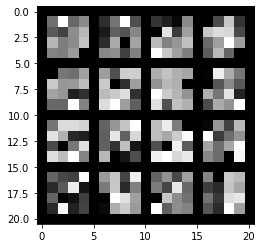

In [18]:
plt.imshow(learn_dict.to_img(), cmap='gray')

In [19]:
# вычисление фич
def get_features(x):
    f_mic = []
    f_mac = []
    for i in range(x.shape[0]):
        values = x[i]
        values = np.abs(values[values!=0])
        sigma, _, mean = sp.stats.lognorm.fit(values, loc=0)
        f_mic.append(np.exp(mean + 0.5*sigma**2))
        f_mac.append(values.shape[0])
    return f_mic + f_mac

In [20]:
# сохраняем словарь на диск
np.save(open('dictionary1.npy', 'wb'), v)

In [21]:
v = np.load(open('dictionary1.npy', 'rb'))

In [22]:
# создание таблицы для записи фич
df = pd.read_csv('images/response.csv')
images = df['image'].tolist()
labels = df['label'].tolist()
image_paths = ['images/images_squares_25/'+image for image in images]
del df
image_paths = image_paths[:50]
columns = ['image']
for i in range(v.shape[1]):
    columns.append('f%d_mic'%(i+1))
for i in range(v.shape[1]):
    columns.append('f%d_mac'%(i+1))
columns.append('label')
data = {column: [] for column in columns}
df = pd.DataFrame(data)

In [23]:
for i, image_path in enumerate(image_paths):
    y = np.zeros(patch_size * patch_size)
    y = get_matrix(y, image_path, patch_size)
    y = y.T
    print(i)
    X = orthogonal_mp(v, y, n_nonzero_coefs=8)
    print(i)
    features = get_features(X)
    data = [images[i]] + features + [labels[i]]
    data = {column: [datum] for column, datum in zip(columns, data)}
    tmp = pd.DataFrame(data)
    df = pd.concat([df, tmp], axis=0)
    print('%d/%d %s' % (i, len(image_paths), image_path))

df.to_csv('dataset2_1.csv', index=False)

0
0
0/50 images/images_squares_25/image1.png
1
1
1/50 images/images_squares_25/image2.png
2
2
2/50 images/images_squares_25/image3.png
3
3
3/50 images/images_squares_25/image4.png
4
4
4/50 images/images_squares_25/image5.png
5
5
5/50 images/images_squares_25/image6.png
6
6
6/50 images/images_squares_25/image7.png
7
7
7/50 images/images_squares_25/image8.png
8
8
8/50 images/images_squares_25/image9.png
9
9
9/50 images/images_squares_25/image10.png
10
10
10/50 images/images_squares_25/image11.png
11
11
11/50 images/images_squares_25/image12.png
12
12
12/50 images/images_squares_25/image13.png
13
13
13/50 images/images_squares_25/image14.png
14
14
14/50 images/images_squares_25/image15.png
15
15
15/50 images/images_squares_25/image16.png
16
16
16/50 images/images_squares_25/image17.png
17
17
17/50 images/images_squares_25/image18.png
18
18
18/50 images/images_squares_25/image19.png
19
19
19/50 images/images_squares_25/image20.png
20
20
20/50 images/images_squares_25/image21.png
21
21
21/5

### Без понижения размерности признаков

In [24]:
df = pd.read_csv('dataset2_1.csv')
columns = [column for column in df.columns if column not in ['image', 'label']]
x = df[columns].to_numpy()
y = df['label'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)
model = make_pipeline(StandardScaler(), SVR(C=35, epsilon=0.1))
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [25]:
max(abs(y_pred-y_test))

5.9273459117928695

In [26]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2.0250276955676005

### Конец

In [ ]:
plt.plot(y_pred, y_test, '.')

In [ ]:
import seaborn as sns # for data visualization
import pandas as pd # for data analysis
import numpy as np # for numeric calculation
import matplotlib.pyplot as plt # for data visualization

In [ ]:
# read dataset
df = pd.read_csv('dataset2.csv')
df = df.drop('image', axis=1)
df = df.drop('label', axis=1)
# get correlations
df_corr = df.corr(method='pearson')

In [ ]:
plt.figure(figsize=(100,100))
# plot heatmap
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})

In [ ]:
from scipy.stats import pearsonr
df = pd.read_csv('dataset2.csv')
df = df.drop('image', axis=1)
df = df.drop('label', axis=1)
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues
pvalues = calculate_pvalues(df)

In [ ]:
pvalues

In [ ]:
df_corr

In [ ]:
# Plotting with significance filter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# get correlation
corr = df.corr(method='pearson')     
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    s_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            s , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
            s_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = s
    return p_matrix, s_matrix
p_values, corr_ = corr_sig(df)                     # get p-Value
mask = np.tril(p_values<0.05)    # mask - only get significant corr
def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(200, 200))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='Blues', linewidths=2, linecolor='black')
plot_cor_matrix(corr_,mask)  

In [ ]:
corr = df.corr(method='pearson')     
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    s_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            s , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
            s_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = s
    return p_matrix, s_matrix
p_values, corr_ = corr_sig(df)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(200, 200))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='Blues', linewidths=2, linecolor='black')
plot_cor_matrix(corr,mask)  

In [ ]:
from scipy.stats import pearsonr
df = pd.read_csv('dataset.csv')
df = df.drop('image', axis=1)
df = df.drop('label', axis=1)

In [ ]:
corr = df.corr(method='pearson')     
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    s_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            s , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
            s_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = s
    return p_matrix, s_matrix
p_values, corr_ = corr_sig(df)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(200, 200))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='Blues', linewidths=2, linecolor='black')
plot_cor_matrix(corr,mask)  

In [ ]:
df = pd.read_csv('dataset.csv')
columns = [column for column in df.columns if column not in ['image', 'label']]
x = df[columns].to_numpy()
y = df['label'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)
model = make_pipeline(StandardScaler(), SVR(C=35, epsilon=0.1))
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
max(abs(y_pred-y_test))

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

In [ ]:
df = pd.read_csv('dataset2.csv')
columns = [column for column in df.columns if column not in ['image', 'label']]
x = df[columns].to_numpy()
y = df['label'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)
model = make_pipeline(StandardScaler(), SVR(C=35, epsilon=0.1))
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
!pip install mlxtend

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from mlxtend.evaluate import feature_importance_permutation

print('Training accuracy:', np.mean(model.predict(x_train) == y_train)*100)
print('Test accuracy:', np.mean(model.predict(x_test) == y_test)*100)

importance_vals = model.feature_importances_
print(importance_vals)

In [ ]:
!pip install eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
feature_names = [i for i in df.columns if df[i].dtype in [np.int64]]
perm = PermutationImportance(model, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

In [ ]:
# params = {'max_depth': 7, 'random_state': 0}

### Permutation importance

In [ ]:
import seaborn as sns
from sklearn.inspection import permutation_importance
premu_train = permutation_importance(model, x_train, y_train, n_repeats=30, random_state=0)

In [ ]:
results = [premu_train]
target_col = ['label', 'image']
n_cols = len(df.columns)

x = df.drop(target_col, axis=1)

names = [ 
    'Support Vector Machine'
    ]

graph_data = {}
for result, name in zip(results, names):
    graph_data[name] = result['importances_mean']

graph_data = pd.DataFrame.from_dict(graph_data, orient='index', columns=x.columns)
graph_data.reset_index(inplace=True, drop=False)
graph_data.rename(columns={'index': 'model_name'}, inplace=True)
graph_data = graph_data.melt(id_vars='model_name')

plt.figure(figsize=[350,100])
plt.axhline(0, c='black')
[plt.axvline(i + 0.5, linestyle='--', c='black') for i in range(0, n_cols)]
sns.barplot(x=graph_data['variable'], y=graph_data['value'], hue=graph_data['model_name'])
plt.title("Permutation Feature Importance Across Models")
plt.xlabel("Variable Name")
plt.ylabel("Change in Mean Squared Error")
plt.savefig('permutation_importance.png')

In [ ]:
print(graph_data)

### Понижение размерности признаков

In [ ]:
list_feature = []
for index, row in graph_data.iterrows():
    if row['value'] > 0.003:
        list_feature.append(row['variable'])
print(len(list_feature))

In [ ]:
print(list_feature)

In [ ]:
df = pd.read_csv('dataset2.csv')
columns = list_feature
x = df[columns].to_numpy()
y = df['label'].to_numpy()
print(x.shape)
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)
model = make_pipeline(StandardScaler(), SVR(C=35, epsilon=0.1))
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred.shape)

In [ ]:
max(abs(y_pred-y_test))

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

### Конец

In [ ]:
# perform permutation importance
results = permutation_importance(model, x_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()